In [1]:
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [3]:
zip_dir_base = os.path.dirname(zip_dir)

base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                         labels='inferred', 
                                                         label_mode='binary', 
                                                         batch_size=1000,
                                                         shuffle = True
                                                        )

Found 2000 files belonging to 2 classes.


In [5]:
val_ds = keras.preprocessing.image_dataset_from_directory(directory = validation_dir,
                                                         labels='inferred', 
                                                         label_mode='binary', 
                                                         batch_size=1000,
                                                         shuffle = True
                                                        )

Found 1000 files belonging to 2 classes.


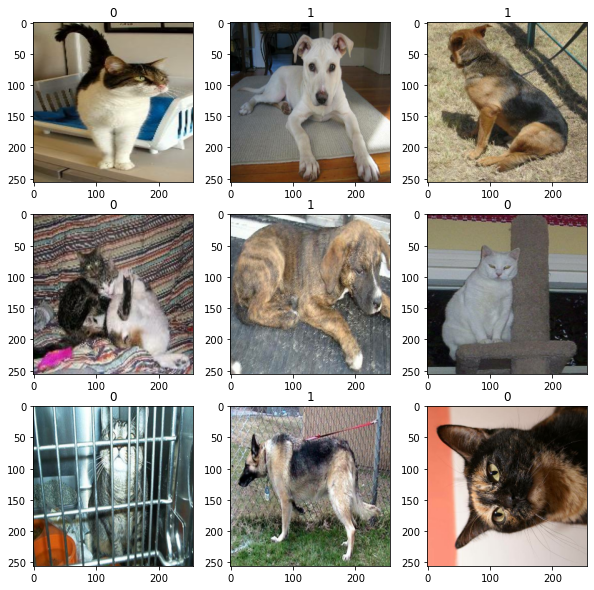

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))

In [20]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(255, 255, 3)),
    
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, 'relu'),
    keras.layers.Dense(1024, 'relu'),
    keras.layers.Dense(2, 'sigmoid')
])


In [21]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 255, 255, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)       